**Session 12: Object Localization - YOLO**

**Objective**

To dentify the right number of template boxes required for the images using Kmeans clusterning technique



1.   images : 50 dog images
2.   resise images to 300X300 using "S12 resise.py"
2.   annotation tool: http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html
3. annotations were saved in the file "tsai_annotations.json"




IMPORTS

In [0]:
import json
import pandas as pd
pd.set_option('display.max_columns', 20)

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Lets us read the json file and create a dataframe for all the images and their annotations. 

In [0]:
json_path = "/content/drive/My Drive/tsai_repo/tsai/S12/"
with open(json_path+'tsai_annotations.json') as f:
  data = json.load(f)
print(data.keys())
print(data["_via_img_metadata"].keys())

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])
dict_keys(['dog_1.jpg19675', 'dog_3.jpg29970', 'dog_2.jpg26414', 'dog_4.jpg22956', 'dog_5.jpg27151', 'dog_6.jpg15007', 'dog_8.jpg27477', 'dog_9.jpg22675', 'dog_10.jpg23829', 'dog_11.jpg23321', 'dog_7.jpg20098', 'dog_13.jpg29588', 'dog_14.jpg39036', 'dog_15.jpg20792', 'dog_16.jpg23200', 'dog_17.jpg31349', 'dog_18.jpg27477', 'dog_19.jpg30309', 'dog_20.jpg21250', 'dog_22.jpg26257', 'dog_23.jpg44257', 'dog_25.jpg25797', 'dog_26.jpg33054', 'dog_27.jpg20913', 'dog_28.jpg28000', 'dog_30.jpg29656', 'dog_32.jpg24085', 'dog_34.jpg18582', 'dog_35.jpg21863', 'dog_36.jpg32118', 'dog_38.jpg21653', 'dog_39.jpg24874', 'dog_37.jpg34629', 'dog_41.jpg20020', 'dog_42.jpg26076', 'dog_43.jpg27622', 'dog_44.jpg34169', 'dog_45.jpg19458', 'dog_46.jpg36320', 'dog_47.jpg28523', 'dog_48.jpg29413', 'dog_49.jpg24965', 'dog_50.jpg20458', 'dog_12.jpg12646', 'dog_21.jpg20234', 'dog_24.jpg21253', 'dog_29.jpg20184', 'dog_31.jpg21727', 'dog_33.jpg38663'

In [0]:
#Dataframe Creation
file_name = []
img_name=[]
img_hight = []
img_width = []
img_class = []
x,y = [],[]
h,w = [],[]

for key, item in data["_via_img_metadata"].items():
  # print(item)
  for regions in item["regions"]:
    x.append(regions["shape_attributes"]["x"])
    y.append(regions["shape_attributes"]["y"])
    h.append(regions["shape_attributes"]["height"])
    w.append(regions["shape_attributes"]["width"])
    img_class.append(regions["region_attributes"]["type"])
    img_name.append(regions["region_attributes"]["name"])
    img_hight.append(300)
    img_width.append(300)
    file_name.append(key)

df = pd.DataFrame([file_name,img_name,img_hight,img_width,img_class,x,y,h,w])
df = df.transpose()
df.columns = ["file_name","img_name","img_hight","img_width","img_class","x","y","h","w"]
df

,file_name,img_name,img_hight,img_width,img_class,x,y,h,w
0,dog_1.jpg19675,dog_1,300,300,dog,0,49,201,174
1,dog_3.jpg29970,dog_3,300,300,dog,74,4,293,161
2,dog_2.jpg26414,dog_2_1,300,300,dog,82,87,130,72
3,dog_2.jpg26414,dog_2_2,300,300,dog,160,85,134,67
4,dog_4.jpg22956,dog_4,300,300,dog,65,74,85,189
...,...,...,...,...,...,...,...,...,...
61,dog_29.jpg20184,dog_29,300,300,dog,140,160,59,60
62,dog_29.jpg20184,human_29,300,300,dog,80,92,114,59
63,dog_31.jpg21727,dog_31,300,300,dog,74,130,84,75
64,dog_33.jpg38663,dog_33,300,300,dog,35,37,254,114


In [0]:
# Normalizing 
df["n_h"] = df["h"]/df["img_hight"] 
df["n_w"] = df["w"]/df["img_width"]
df["n_x"] = df["x"]/df["img_width"]
df["n_y"] = df["y"]/df["img_hight"]
print("Normalised value ranges")
print(df[["n_x","n_y","n_h","n_w"]].astype('float').describe())
print("\nTable with normalised values")
df

Normalised value ranges
             n_x        n_y        n_h        n_w
count  66.000000  66.000000  66.000000  66.000000
mean    0.294596   0.286263   0.480808   0.366717
std     0.167926   0.125601   0.177961   0.163890
min     0.000000   0.013333   0.193333   0.096667
25%     0.155833   0.206667   0.369167   0.231667
50%     0.273333   0.273333   0.450000   0.341667
75%     0.426667   0.355833   0.565833   0.460000
max     0.643333   0.690000   0.976667   0.740000

Table with normalised values


,file_name,img_name,img_hight,img_width,img_class,x,y,h,w,n_h,n_w,n_x,n_y
0,dog_1.jpg19675,dog_1,300,300,dog,0,49,201,174,0.67,0.58,0,0.163333
1,dog_3.jpg29970,dog_3,300,300,dog,74,4,293,161,0.976667,0.536667,0.246667,0.0133333
2,dog_2.jpg26414,dog_2_1,300,300,dog,82,87,130,72,0.433333,0.24,0.273333,0.29
3,dog_2.jpg26414,dog_2_2,300,300,dog,160,85,134,67,0.446667,0.223333,0.533333,0.283333
4,dog_4.jpg22956,dog_4,300,300,dog,65,74,85,189,0.283333,0.63,0.216667,0.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,dog_29.jpg20184,dog_29,300,300,dog,140,160,59,60,0.196667,0.2,0.466667,0.533333
62,dog_29.jpg20184,human_29,300,300,dog,80,92,114,59,0.38,0.196667,0.266667,0.306667
63,dog_31.jpg21727,dog_31,300,300,dog,74,130,84,75,0.28,0.25,0.246667,0.433333
64,dog_33.jpg38663,dog_33,300,300,dog,35,37,254,114,0.846667,0.38,0.116667,0.123333


**K Means Clustering**
1. **Visualization:** Let us plot all the n_h aand n_w on a scatter plot, we assume the the box is starting from index(0,0).
If we draw horizontal and vertcle lines for all these points we can visualise all the boxes starting at (0,0)

2. **Indemtify the number of cluster:** Kmeans algorithm needs and input of "number of clusters", we shall find out the ideal number from the elbow curve.
to identify the best cluster we need to have within cluster sum of squares to be very less, this means all the points in a cluster are very close to each other. We will run 20 iterartion and plot the curve.

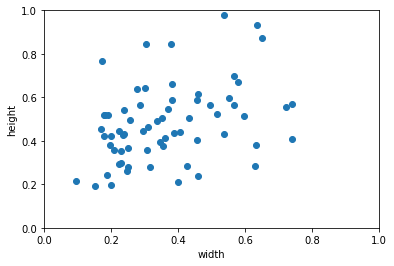

In [0]:
# Kmeans Clustering
plt.scatter(df['n_w'],df['n_h'])
plt.xlabel("width")
plt.ylabel("height")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [0]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=11, random_state=0)
    kmeans.fit(df[['n_w','n_h']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss,"--bo")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Fitting the model:** From the above chart we can choose the number to be 4 as after 4 groups we see that there the drop is wcss is not very significant. Fit the kmeans with cluster sizre = 4 and visulaze the 4 clusters and centroids.
The centroids will represent high and width of 4 template boxes

In [0]:
# Fit with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df[['n_w','n_h']])
plt.scatter(df['n_w'],df['n_h'], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red')
plt.xlabel("width")
plt.ylabel("height")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
print("Cluster Centers")
kmeans.cluster_centers_

In [0]:
# plt.scatter(df['n_h'],df['n_w'], c=pred_y)
print("Centroids")
for row in kmeans.cluster_centers_:
  print(row)
  rectangle = plt.Rectangle((0,0), row[0], row[1], fc='none',ec="red")
  plt.gca().add_patch(rectangle)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("width")
plt.ylabel("height")
print("\nTemplate Boxes")
plt.show()